In [1]:
import ScraperFC as sfc
import traceback
from data_viz_helpers import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
scraper = sfc.WhoScored()
try:
    # the link below is to the Southampton-Tottenham game in September 2020
    match_data = scraper.scrape_match(
        'https://www.whoscored.com/Matches/1485202/Live/' + \
        'England-Premier-League-2020-2021-Southampton-Tottenham'
    )
#     match_data = scraper.scrape_match(
#         'https://www.whoscored.com/Matches/1558307/Live/' + \
#         'France-Ligue-1-2021-2022-Metz-Lille'
#     )
except:
    traceback.print_exc()
scraper.close()

Get the home and away player IDs.

In [3]:
home_ids = [player['playerId'] for player in match_data['matchCentreData']['home']['players']]
away_ids = [player['playerId'] for player in match_data['matchCentreData']['away']['players']]

Now let's get the average positions of every player. First, we'll find all of their events and then the average positions of those events.

In [4]:
# Build dicts for the home and away starters
home, away = dict(), dict()
for i in range(11):
    home_id = home_ids[i]
    home[home_id] = dict()
    # Get the player's name and shirt number
    for player in match_data['matchCentreData']['home']['players']:
        if player['playerId'] == home_id:
            home[home_id]['name'] = player['name']
            home[home_id]['number'] = player['shirtNo']
    # add a place to store their events and average position
    home[home_id]['events'] = list()
    
    away_id = away_ids[i]
    away[away_id] = dict()
    for player in match_data['matchCentreData']['away']['players']:
        if player['playerId'] == away_id:
            away[away_id]['name'] = player['name']
            away[away_id]['number'] = player['shirtNo']
    away[away_id]['events'] = list()

    
# Get the events for each player
for event in match_data['matchCentreData']['events']:
    if 'playerId' not in event.keys():
        continue
    elif event['playerId'] in home.keys():
        home[event['playerId']]['events'].append([event['x'], event['y']])
    elif event['playerId'] in away.keys():
        away[event['playerId']]['events'].append([event['x'], event['y']])


# get the average position of each player
for i in range(11):
    ID = list(home.keys())[i]
    avg_pos = np.mean(home[ID]['events'], axis=0) # find the average position of the player
    rescaled_pos = np.multiply(avg_pos, [130/100, 90/100]) # scale to our plotting range
    home[ID]['avg pos'] = rescaled_pos
    
    ID = list(away.keys())[i]
    avg_pos = np.mean(away[ID]['events'], axis=0)
    # For the away team, we need to flip their locations
    rescaled_pos = np.multiply(avg_pos, [-130/100, -90/100]) # so use -130/100 here
    rescaled_pos = np.add(rescaled_pos, [130, 90]) # and shift their x position to the right
    away[ID]['avg pos'] = rescaled_pos

Now let's plot those average positions. We'll add the player's number onto the plot so we can see which player was where.

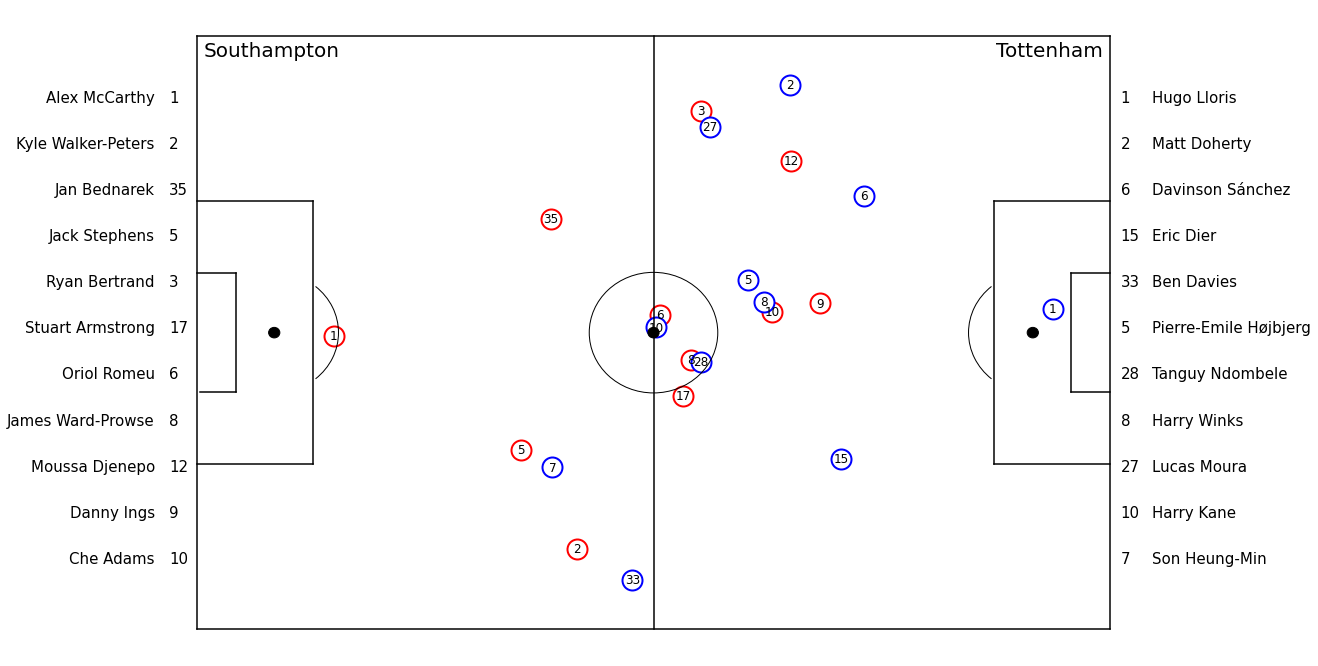

In [5]:
fig, ax = plt.subplots(figsize=[18,12])
ax = plot_field(ax)

# home team
ax.text(1, 87, match_data['matchCentreData']['home']['name'], fontsize=20)
for i in range(11):
    ID = list(home.keys())[i]
    ax.scatter(
        home[ID]['avg pos'][0], home[ID]['avg pos'][1], 
        s=400, linewidth=2,
        facecolor='white', edgecolor='red'
    )
    ax.text(
        home[ID]['avg pos'][0], home[ID]['avg pos'][1], 
        home[ID]['number'], fontsize=12,
        horizontalalignment='center', verticalalignment='center'
    )
    ax.text(
        -6, 80-7*i, 
        home[ID]['name'], horizontalalignment='right',
        fontsize=15
    )
    ax.text(
        -4, 80-7*i,
        home[ID]['number'],
        fontsize=15
    )


# away team
ax.text(129, 87, match_data['matchCentreData']['away']['name'], fontsize=20, horizontalalignment='right')
for i in range(11):
    ID = list(away.keys())[i]
    ax.scatter(
        away[ID]['avg pos'][0], away[ID]['avg pos'][1], 
        s=400, linewidth=2,
        facecolor='white', edgecolor='blue'
    )
    ax.text(
        away[ID]['avg pos'][0], away[ID]['avg pos'][1], 
        away[ID]['number'], fontsize=12,
        horizontalalignment='center', verticalalignment='center'
    )
    ax.text(
        136, 80-7*i, 
        away[ID]['name'], horizontalalignment='left',
        fontsize=15
    )
    ax.text(
        131.5, 80-7*i,
        away[ID]['number'],
        fontsize=15
    )

    
plt.show()